In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [205]:
df=pd.read_csv('cubic.csv',index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [206]:
print(f'The rows and columns in this dataset is {df.shape} respectively')

The rows and columns in this dataset is (26967, 10) respectively


<IPython.core.display.Javascript object>

<AxesSubplot:>

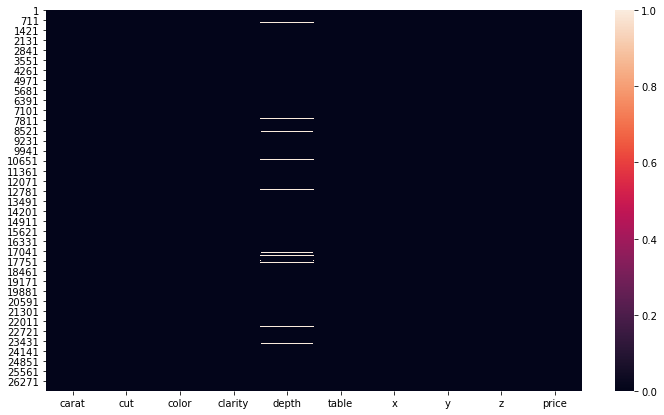

In [207]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull())

Here you can see there are some null values in the depth column.So first we will fill the null values.

In [208]:
nul=df['depth'].isnull().sum()
print(f'There are total of {nul} missing values in depth column.')

There are total of 697 missing values in depth column.


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='depth'>

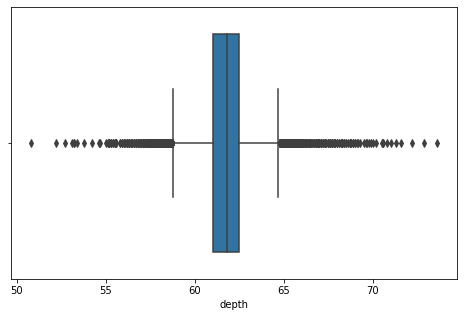

In [209]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df.depth)

<IPython.core.display.Javascript object>

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='depth', ylabel='Density'>

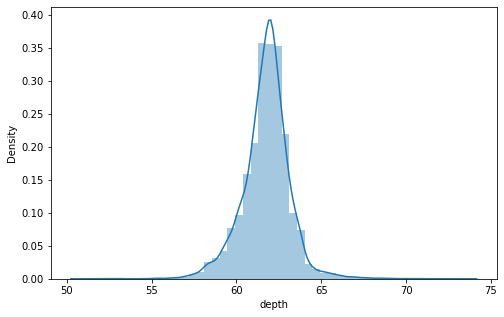

In [210]:
plt.figure(figsize=(8,5))
sns.distplot(df.depth)

The data is evenly distributed hence we can replcae the null values with mean of the depth.

In [211]:
df['depth'].fillna(df['depth'].mean(),inplace=True)

<IPython.core.display.Javascript object>

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='color', ylabel='count'>

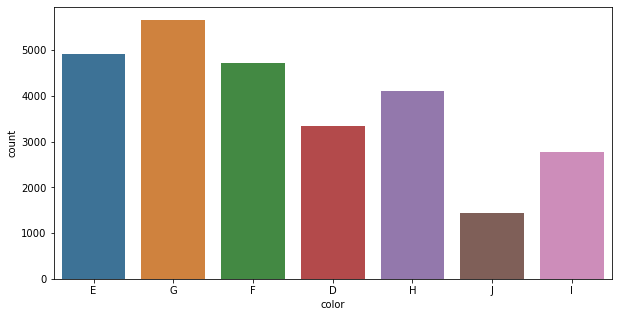

In [212]:
plt.figure(figsize=(10,5))
sns.countplot(df.color,saturation=0.6)

color with maximum count is 'G' and minmum is 'j'

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='price', ylabel='Count'>

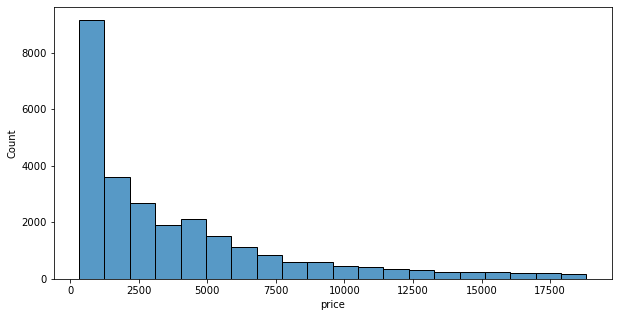

In [213]:
plt.figure(figsize=(10,5))
sns.histplot(df.price,bins=20)

Here we can observe that as the price goes on increasing the count of diamonds also decrease.

<IPython.core.display.Javascript object>

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clarity', ylabel='count'>

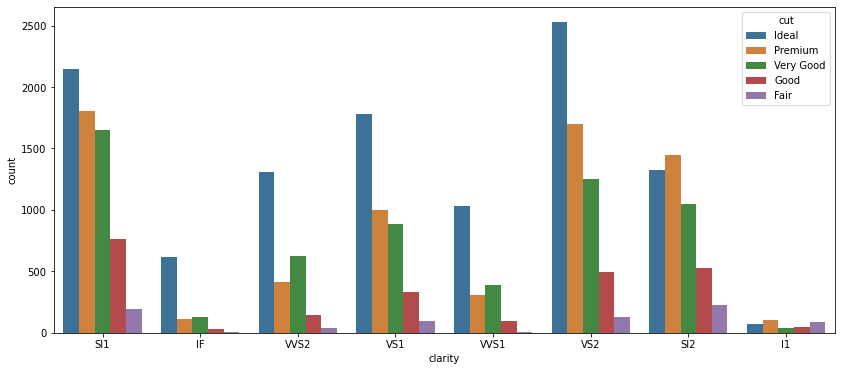

In [214]:
plt.figure(figsize=(14,6))
sns.countplot(df.clarity,saturation=0.6,hue=df.cut)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='carat', ylabel='price'>

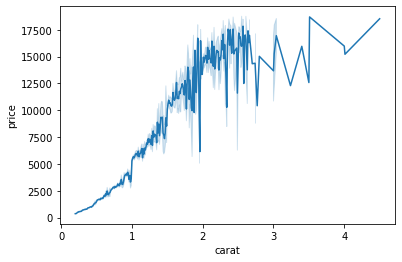

In [215]:
sns.lineplot(data=df,x='carat',y='price')

As you can see there is an upward trend when carat and price is compared.Basically we can observe that as the carat values increases the price of diamond aslo increases

<IPython.core.display.Javascript object>

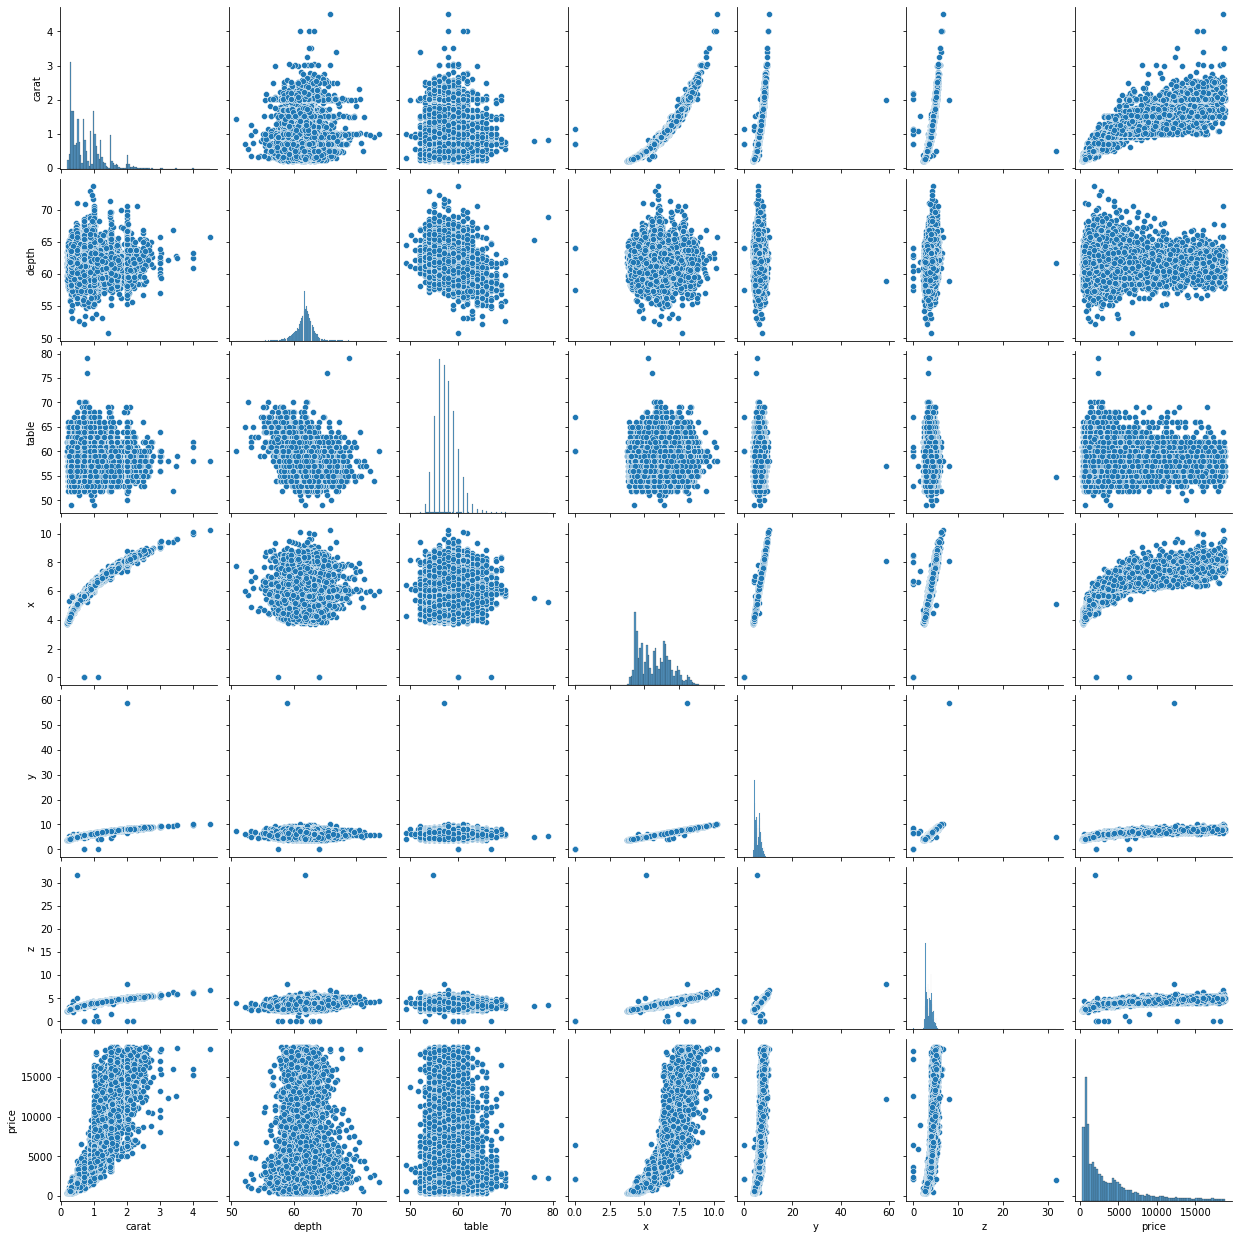

In [216]:
sns.pairplot(df)

In [217]:
color=pd.get_dummies(df.color,drop_first=True)
clarity=pd.get_dummies(df.clarity,drop_first=True)
cut=pd.get_dummies(df.cut,drop_first=True)

In [218]:
df=pd.concat([df,color,clarity,cut],axis=1)
df.drop(['cut','clarity','color'],axis=1)

,carat,depth,table,x,y,z,price,E,F,G,...,SI1,SI2,VS1,VS2,VVS1,VVS2,Good,Ideal,Premium,Very Good
1,0.30,62.1,58.0,4.27,4.29,2.66,499,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0.90,62.2,60.0,6.04,6.12,3.78,6289,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,1,0,...,0,0,1,0,0,0,0,1,0,0
5,0.31,60.4,59.0,4.35,4.43,2.65,779,0,1,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26963,1.11,62.3,58.0,6.61,6.52,4.09,5408,0,0,1,...,1,0,0,0,0,0,0,0,1,0
26964,0.33,61.9,55.0,4.44,4.42,2.74,1114,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26965,0.51,61.7,58.0,5.12,5.15,3.17,1656,1,0,0,...,0,0,0,1,0,0,0,0,1,0
26966,0.27,61.8,56.0,4.19,4.20,2.60,682,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [219]:
cor=df.corr()
cor_target = abs(cor["price"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

carat    0.922416
x        0.886247
y        0.856243
z        0.850536
price    1.000000
Name: price, dtype: float64

The above features are highly corelated with price column.